In [2]:
import numpy as np
import nibabel as nb
from rois.roi_utils import find_nonzero_index, slice_brain, get_slice_mni, get_spherical_roi
import matplotlib
from nilearn.plotting import plot_roi
from nilearn.image import new_img_like, coord_transform
from nilearn import datasets

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


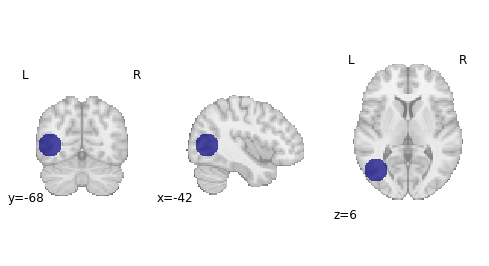

In [11]:
plot_roi('../../../anat_roi_masks/infocoupling-sphere_rad15.nii', draw_cross=False)

In [12]:
nb.load('../../../anat_roi_masks/infocoupling-sphere_rad15.nii').get_fdata().shape

(79, 95, 79)

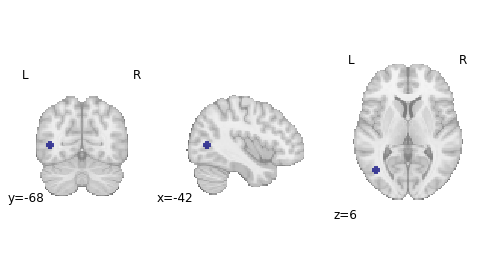

In [6]:
plot_roi('../../../anat_roi_masks/infocoupling-sphere_rad5.nii', draw_cross=False)

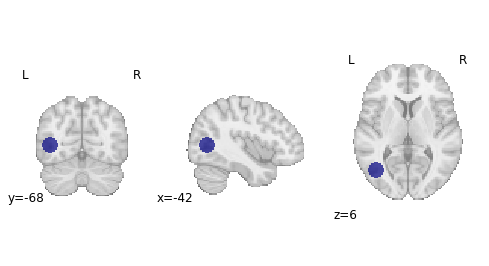

In [7]:
plot_roi('../../../anat_roi_masks/infocoupling-sphere_rad11.nii', draw_cross=False)

In [ ]:
plot_roi('../../../anat_roi_masks/infocoupling-sphere_rad5.nii')

In [2]:
binary_vol = nb.load('../../../anat_roi_masks/wholebrain.nii')

In [2]:
slices = slice_brain(mask='visualsystem')

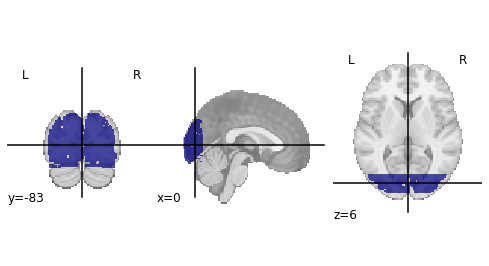

In [3]:
plot_roi(slices[3])

In [51]:
thinslice = slices[0].get_fdata()
thinslice[:, 5:, :] = 0
thinslice = new_img_like(slices[0], thinslice)

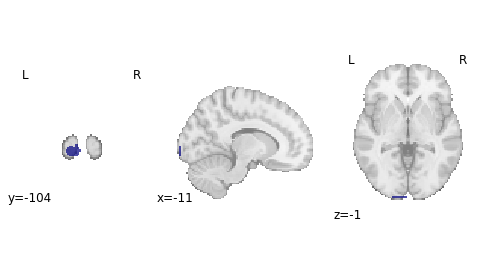

In [52]:
plot_roi(thinslice, draw_cross=False)

In [60]:
sphere_roi = get_spherical_roi(coords=[0, -120, 0], radius=2)

/home/predatt/giaald/.conda/envs/giacomo37/lib/python3.8/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/home/predatt/giaald/.conda/envs/giacomo37/lib/python3.8/site-packages/nilearn/image/resampling.py:291: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  warnings.warn(


/home/predatt/giaald/.conda/envs/giacomo37/lib/python3.8/site-packages/nilearn/plotting/find_cuts.py:66: UserWarning: Given img is empty. Returning default cut_coords=(0.0, 0.0, 0.0) instead.
  warnings.warn(
/home/predatt/giaald/.conda/envs/giacomo37/lib/python3.8/site-packages/nilearn/plotting/displays/_slicers.py:438: UserWarning: empty mask
  xmin_, xmax_, ymin_, ymax_, zmin_, zmax_ = get_mask_bounds(
/home/predatt/giaald/.conda/envs/giacomo37/lib/python3.8/site-packages/numpy/ma/core.py:2829: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


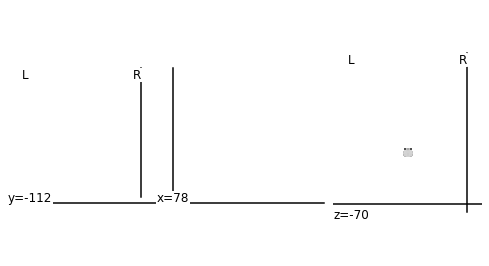

In [61]:
plot_roi(sphere_roi)

In [21]:
start = find_nonzero_index(slices[0].get_fdata(), 1,
                               firstorlast='first')

In [47]:
slices[0].get_fdata()[40:50,6,30:40]

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [22]:
start

4

In [7]:
niimg = datasets.load_mni152_template()

In [64]:
coords = [0, 4, 0]
coord_transform(*coords, slices[0].affine)

(78.0, -104.0, -70.0)

In [4]:
get_slice_mni(slices[0])

(-104.0, -80.0)

In [5]:
slices[0].affine

array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -70.],
       [   0.,    0.,    0.,    1.]])

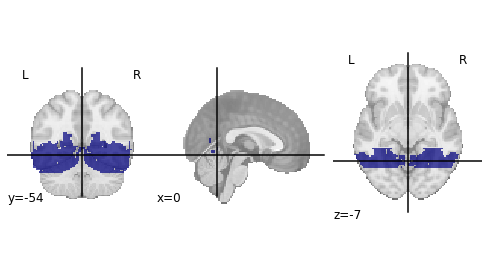

In [8]:
plot_roi(slices[20])

In [104]:
find_nonzero_index(binary_vol, 1, firstorlast='last')

91

In [106]:
binary_vol[30:50,92,39]

memmap([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.])

In [27]:
def first_nonzero(arr, axis, invalid_val=-1):
    mask = arr!=0
    return np.where(mask.any(axis=axis), mask.argmax(axis=axis), invalid_val)

In [50]:
mask = binary_vol != 0

In [64]:
mask = binary_vol > 1e-8

In [75]:
np.unique(binary_vol[binary_vol>1e-8])

array([1.])

In [70]:
mask.shape

(79, 95, 79)

In [65]:
np.unique(mask)

array([False,  True])

In [61]:
np.unique(np.argmax(mask, axis=1))

array([0])

In [ ]:
np.max()

In [89]:
np.min(np.where(np.argmax(mask, axis=1))[0])

4

In [90]:
np.max(np.where(np.argmax(mask, axis=1))[0])

74

In [49]:
binary_vol = nb.load('../../../anat_roi_masks/wholebrain.nii').get_fdata()

In [35]:
first_nonzero(binary_vol[:, 54, :], 0)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [4]:
binary_vol = binary_vol != 0

In [6]:
max_along_axis = np.max(binary_vol, axis=1)

In [8]:
max_along_axis.shape

(79, 79)

In [9]:
indices = np.where(binary_vol)

In [10]:
indices

(array([ 5,  5,  5, ..., 73, 74, 74]),
 array([32, 32, 32, ..., 32, 32, 32]),
 array([29, 30, 31, ..., 33, 30, 31]))

In [12]:
axis = 1
last_nonzero_index = [idx[axis] for idx in zip(*indices) if max_along_axis[tuple(idx[i] for i in range(binary_vol.ndim) if i != axis)]][-1]

In [16]:
first_nonzero_index = [idx[axis] for idx in zip(*indices) if max_along_axis[tuple(idx[i] for i in range(binary_vol.ndim) if i != axis)]]

In [17]:
first_nonzero_index

[32,
 32,
 32,
 32,
 32,
 29,
 30,
 31,
 31,
 31,
 31,
 31,
 31,
 32,
 32,
 32,
 32,
 33,
 27,
 27,
 27,
 27,
 27,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 32,
 32,
 32,
 32,
 32,
 33,
 33,
 33,
 33,
 25,
 25,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 32,
 32,
 32,
 32,
 32,
 32,
 33,
 33,
 33,
 24,
 24,
 24,
 24,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
